In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/update-dataset/sample_submission.csv
/kaggle/input/update-dataset/train.csv
/kaggle/input/update-dataset/test.csv


In [108]:
train=pd.read_csv("/kaggle/input/update-dataset/train.csv")
train

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
0,TRAIN_000000,SG,GIW5,Container,30.881018,2018-12-17 21:29,Z618338,30.0,24,24300,10.0,10.0,16700,180.0,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.002615,3.450000
1,TRAIN_000001,IN,UJM2,Bulk,0.000000,2014-09-23 6:59,X886125,30.0,13,35900,10.0,10.0,23500,180.0,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.000217,0.000000
2,TRAIN_000002,CN,EUC8,Container,0.000000,2015-02-03 22:00,T674582,50.0,12,146000,30.0,20.0,140000,370.0,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.001614,0.000000
3,TRAIN_000003,JP,ZAG4,Container,0.000000,2020-01-17 4:02,Y847238,20.0,18,6910,10.0,10.0,5400,120.0,PBZV77,Bahamas,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
4,TRAIN_000004,SG,GIW5,Container,27.037650,2020-01-26 7:51,A872328,50.0,10,116000,20.0,10.0,96600,300.0,GUCE76,Liberia,-0.33,-3.28,25.6,2.495953,15,0.002615,253.554444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391934,TRAIN_391934,JP,QYY1,Container,0.000000,2017-06-06 5:02,Y375615,20.0,27,6820,10.0,10.0,4820,110.0,KEJZ24,"China, People's Republic Of",NaN,NaN,NaN,NaN,14,0.000552,0.000000
391935,TRAIN_391935,SG,GIW5,Bulk,5.884603,2019-10-16 0:36,K635567,10.0,12,3160,10.0,10.0,1600,80.0,JLTM64,Vietnam,-0.66,0.97,27.3,1.253491,8,0.002615,144.061389
391936,TRAIN_391936,US,QGN3,Bulk,70.660241,2021-03-23 22:35,J284147,30.0,8,60300,20.0,10.0,34800,200.0,YERJ68,Singapore,-3.44,7.99,21.1,4.766257,18,0.000155,41.482222
391937,TRAIN_391937,TW,JWI3,Container,9.448179,2015-01-08 7:15,J644215,30.0,29,23800,10.0,10.0,16900,170.0,HCZK58,Comoros,NaN,NaN,NaN,NaN,15,0.000990,7.485278


/tmp/ipykernel_32/138189454.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["CI_HOUR"])


<Axes: xlabel='CI_HOUR', ylabel='Density'>

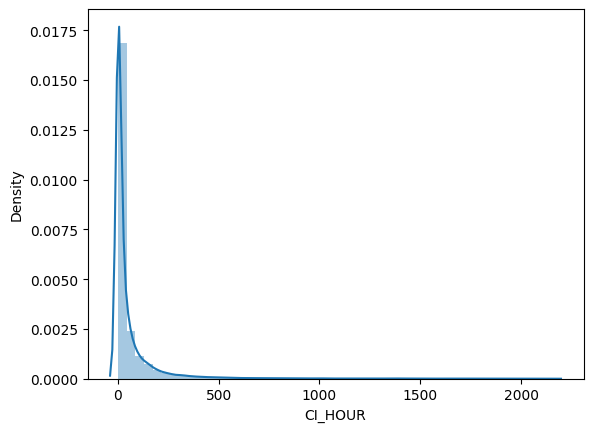

In [109]:
import seaborn as sns 
sns.distplot(train["CI_HOUR"])

/tmp/ipykernel_32/582616464.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((train["CI_HOUR"]**(1/3)))


<Axes: xlabel='CI_HOUR', ylabel='Density'>

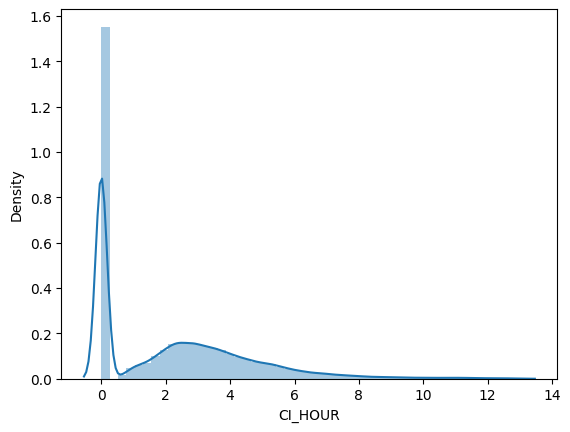

In [110]:
import seaborn as sns 
sns.distplot((train["CI_HOUR"]**(1/3)))

In [111]:
#최솟값찾기
train["CI_HOUR"].min()

0.0

In [112]:
test=pd.read_csv("/kaggle/input/update-dataset/test.csv")
test

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE
0,TEST_000000,SG,GIW5,Container,1.826589,2020-06-18 11:58,K322654,50.0,18,117000,30.0,20.0,109000,340.0,KQMD74,Panama,0.37,1.63,27.1,1.587063,19,0.002615
1,TEST_000001,CN,WEY7,Cargo,25.399386,2021-05-26 22:20,E376681,10.0,13,3810,10.0,10.0,2560,80.0,LBYS27,Belize,-2.79,-2.33,14.2,2.663972,6,0.001028
2,TEST_000002,CN,NGG6,Container,111.079467,2019-12-16 0:09,F811111,20.0,26,10900,10.0,10.0,8440,140.0,EKFV15,Singapore,0.04,-4.91,9.3,3.255315,8,0.001743
3,TEST_000003,CA,FFM2,Bulk,9.175258,2015-11-16 5:30,A737561,30.0,9,55800,20.0,10.0,31500,190.0,MASW32,Panama,NaN,NaN,NaN,NaN,2,0.000182
4,TEST_000004,JP,QYY1,Container,0.000000,2018-10-24 1:11,A827175,30.0,19,39800,20.0,10.0,33000,220.0,SIEL54,Liberia,NaN,NaN,NaN,NaN,10,0.000552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220486,TEST_220486,BR,TMW2,Bulk,21.712733,2017-04-04 15:53,E731427,60.0,15,298000,30.0,20.0,151000,330.0,UWHE18,Japan,NaN,NaN,NaN,NaN,13,0.000080
220487,TEST_220487,CA,GRQ5,Bulk,4.870490,2016-08-22 16:22,Q434522,30.0,9,80500,20.0,10.0,42700,220.0,BBXV46,Liberia,NaN,NaN,NaN,NaN,13,0.000039
220488,TEST_220488,JP,VYJ1,Tanker,17.068286,2022-07-10 14:53,U148516,10.0,14,1200,0.0,0.0,500,60.0,DYUA26,Japan,-2.87,1.22,27.4,2.405268,23,0.000264
220489,TEST_220489,CN,QQW1,Cargo,0.000000,2020-12-28 14:38,C235264,10.0,27,3420,10.0,0.0,2000,80.0,VKVS56,Belize,-2.65,-0.64,8.2,2.199039,22,0.000595


In [113]:
all_data=pd.concat([train,test])
all_data

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
0,TRAIN_000000,SG,GIW5,Container,30.881018,2018-12-17 21:29,Z618338,30.0,24,24300,10.0,10.0,16700,180.0,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.002615,3.450000
1,TRAIN_000001,IN,UJM2,Bulk,0.000000,2014-09-23 6:59,X886125,30.0,13,35900,10.0,10.0,23500,180.0,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.000217,0.000000
2,TRAIN_000002,CN,EUC8,Container,0.000000,2015-02-03 22:00,T674582,50.0,12,146000,30.0,20.0,140000,370.0,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.001614,0.000000
3,TRAIN_000003,JP,ZAG4,Container,0.000000,2020-01-17 4:02,Y847238,20.0,18,6910,10.0,10.0,5400,120.0,PBZV77,Bahamas,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
4,TRAIN_000004,SG,GIW5,Container,27.037650,2020-01-26 7:51,A872328,50.0,10,116000,20.0,10.0,96600,300.0,GUCE76,Liberia,-0.33,-3.28,25.6,2.495953,15,0.002615,253.554444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220486,TEST_220486,BR,TMW2,Bulk,21.712733,2017-04-04 15:53,E731427,60.0,15,298000,30.0,20.0,151000,330.0,UWHE18,Japan,NaN,NaN,NaN,NaN,13,0.000080,NaN
220487,TEST_220487,CA,GRQ5,Bulk,4.870490,2016-08-22 16:22,Q434522,30.0,9,80500,20.0,10.0,42700,220.0,BBXV46,Liberia,NaN,NaN,NaN,NaN,13,0.000039,NaN
220488,TEST_220488,JP,VYJ1,Tanker,17.068286,2022-07-10 14:53,U148516,10.0,14,1200,0.0,0.0,500,60.0,DYUA26,Japan,-2.87,1.22,27.4,2.405268,23,0.000264,NaN
220489,TEST_220489,CN,QQW1,Cargo,0.000000,2020-12-28 14:38,C235264,10.0,27,3420,10.0,0.0,2000,80.0,VKVS56,Belize,-2.65,-0.64,8.2,2.199039,22,0.000595,NaN


In [114]:
#weekday column 추가하기 
#dt.date 칼럼 
all_data["ATA"]=pd.to_datetime(all_data["ATA"])
#dt.date => 도움이되는 이유는 예전이랑비교해서 지금은 발전했을수도 있다 
all_data["Date"]=all_data["ATA"].dt.date               
all_data["Year"]=all_data["ATA"].dt.year
all_data['Months']= all_data['ATA'].dt.month
all_data['Day']= all_data['ATA'].dt.day
all_data['Hours']= all_data['ATA'].dt.hour
all_data['Weekdays']= all_data['ATA'].dt.weekday

In [115]:
pd.options.display.max_columns=99

In [116]:
all_data2=all_data.drop(columns=["CI_HOUR","SAMPLE_ID","ATA"])
all_data2

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,Date,Year,Months,Day,Hours,Weekdays
0,SG,GIW5,Container,30.881018,Z618338,30.0,24,24300,10.0,10.0,16700,180.0,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.002615,2018-12-17,2018,12,17,21,0
1,IN,UJM2,Bulk,0.000000,X886125,30.0,13,35900,10.0,10.0,23500,180.0,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.000217,2014-09-23,2014,9,23,6,1
2,CN,EUC8,Container,0.000000,T674582,50.0,12,146000,30.0,20.0,140000,370.0,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.001614,2015-02-03,2015,2,3,22,1
3,JP,ZAG4,Container,0.000000,Y847238,20.0,18,6910,10.0,10.0,5400,120.0,PBZV77,Bahamas,-3.18,-1.61,6.7,2.629350,13,0.000356,2020-01-17,2020,1,17,4,4
4,SG,GIW5,Container,27.037650,A872328,50.0,10,116000,20.0,10.0,96600,300.0,GUCE76,Liberia,-0.33,-3.28,25.6,2.495953,15,0.002615,2020-01-26,2020,1,26,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220486,BR,TMW2,Bulk,21.712733,E731427,60.0,15,298000,30.0,20.0,151000,330.0,UWHE18,Japan,NaN,NaN,NaN,NaN,13,0.000080,2017-04-04,2017,4,4,15,1
220487,CA,GRQ5,Bulk,4.870490,Q434522,30.0,9,80500,20.0,10.0,42700,220.0,BBXV46,Liberia,NaN,NaN,NaN,NaN,13,0.000039,2016-08-22,2016,8,22,16,0
220488,JP,VYJ1,Tanker,17.068286,U148516,10.0,14,1200,0.0,0.0,500,60.0,DYUA26,Japan,-2.87,1.22,27.4,2.405268,23,0.000264,2022-07-10,2022,7,10,14,6
220489,CN,QQW1,Cargo,0.000000,C235264,10.0,27,3420,10.0,0.0,2000,80.0,VKVS56,Belize,-2.65,-0.64,8.2,2.199039,22,0.000595,2020-12-28,2020,12,28,14,0


In [117]:
cat=all_data2.columns[all_data2.dtypes==object]
cat

Index(['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'ID', 'SHIPMANAGER', 'FLAG',
       'Date'],
      dtype='object')

In [118]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat:
    all_data2[i]=le.fit_transform(all_data2[i])
    
all_data2

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,Date,Year,Months,Day,Hours,Weekdays
0,17,21,2,30.881018,26361,30.0,24,24300,10.0,10.0,16700,180.0,711,90,NaN,NaN,NaN,NaN,5,0.002615,1568,2018,12,17,21,0
1,7,81,0,0.000000,24690,30.0,13,35900,10.0,10.0,23500,180.0,4971,75,NaN,NaN,NaN,NaN,12,0.000217,22,2014,9,23,6,1
2,4,14,2,0.000000,20310,50.0,12,146000,30.0,20.0,140000,370.0,1436,74,NaN,NaN,NaN,NaN,6,0.001614,155,2015,2,3,22,1
3,8,101,2,0.000000,25655,20.0,18,6910,10.0,10.0,5400,120.0,4006,5,-3.18,-1.61,6.7,2.629350,13,0.000356,1964,2020,1,17,4,4
4,17,21,2,27.037650,972,50.0,10,116000,20.0,10.0,96600,300.0,1770,68,-0.33,-3.28,25.6,2.495953,15,0.002615,1973,2020,1,26,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220486,1,76,0,21.712733,4879,60.0,15,298000,30.0,20.0,151000,330.0,5586,60,NaN,NaN,NaN,NaN,13,0.000080,946,2017,4,4,15,1
220487,2,23,0,4.870490,16919,30.0,9,80500,20.0,10.0,42700,220.0,281,68,NaN,NaN,NaN,NaN,13,0.000039,721,2016,8,22,16,0
220488,8,88,3,17.068286,20672,10.0,14,1200,0.0,0.0,500,60.0,1057,60,-2.87,1.22,27.4,2.405268,23,0.000264,2869,2022,7,10,14,6
220489,4,62,1,0.000000,2222,10.0,27,3420,10.0,0.0,2000,80.0,5750,10,-2.65,-0.64,8.2,2.199039,22,0.000595,2310,2020,12,28,14,0


In [119]:
all_data2=all_data2.fillna(-1)

In [120]:
train_2=all_data2[:len(train)]
test_2=all_data2[len(train):]
train_2

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,Date,Year,Months,Day,Hours,Weekdays
0,17,21,2,30.881018,26361,30.0,24,24300,10.0,10.0,16700,180.0,711,90,-1.00,-1.00,-1.0,-1.000000,5,0.002615,1568,2018,12,17,21,0
1,7,81,0,0.000000,24690,30.0,13,35900,10.0,10.0,23500,180.0,4971,75,-1.00,-1.00,-1.0,-1.000000,12,0.000217,22,2014,9,23,6,1
2,4,14,2,0.000000,20310,50.0,12,146000,30.0,20.0,140000,370.0,1436,74,-1.00,-1.00,-1.0,-1.000000,6,0.001614,155,2015,2,3,22,1
3,8,101,2,0.000000,25655,20.0,18,6910,10.0,10.0,5400,120.0,4006,5,-3.18,-1.61,6.7,2.629350,13,0.000356,1964,2020,1,17,4,4
4,17,21,2,27.037650,972,50.0,10,116000,20.0,10.0,96600,300.0,1770,68,-0.33,-3.28,25.6,2.495953,15,0.002615,1973,2020,1,26,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391934,8,66,2,0.000000,25061,20.0,27,6820,10.0,10.0,4820,110.0,2691,20,-1.00,-1.00,-1.0,-1.000000,14,0.000552,1009,2017,6,6,5,1
391935,17,21,0,5.884603,10911,10.0,12,3160,10.0,10.0,1600,80.0,2515,125,-0.66,0.97,27.3,1.253491,8,0.002615,1871,2019,10,16,0,2
391936,21,61,0,70.660241,9432,30.0,8,60300,20.0,10.0,34800,200.0,6450,103,-3.44,7.99,21.1,4.766257,18,0.000155,2395,2021,3,23,22,1
391937,19,35,2,9.448179,9884,30.0,29,23800,10.0,10.0,16900,170.0,1860,22,-1.00,-1.00,-1.0,-1.000000,15,0.000990,129,2015,1,8,7,3


In [121]:
#데이터 구분해서 20%만 평가 데이터로 구성 / 80%는 학습데이터로 구성
#Seperating the data to validation and train set that 20% is the validation set and 80% is the train set 

from sklearn.model_selection import train_test_split
#x_train,x_valid,y_train,y_valid=train_test_split(train_2,np.log1p(train["CI_HOUR"]),test_size=0.2,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(train_2,(train["CI_HOUR"]**(1/4)),test_size=0.2,random_state=42)

x_train

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,Date,Year,Months,Day,Hours,Weekdays
93953,8,66,2,0.000000,16213,40.0,12,52200,20.0,10.0,44900,270.0,760,103,-1.00,-1.00,-1.0,-1.000000,20,0.000552,1598,2019,1,16,11,2
56637,8,88,0,0.000000,23899,30.0,13,37300,20.0,10.0,24100,190.0,6538,75,-1.00,-1.00,-1.0,-1.000000,8,0.000264,967,2017,4,25,23,1
60596,4,31,0,12.819585,15971,30.0,10,82000,20.0,10.0,44400,230.0,2582,51,-1.00,-1.00,-1.0,-1.000000,0,0.001026,1049,2017,7,16,16,6
184964,4,45,2,106.316723,26600,30.0,19,37900,20.0,10.0,27700,220.0,264,54,-1.00,-1.00,-1.0,-1.000000,2,0.001743,761,2016,10,1,18,5
286184,8,27,1,27.537762,2589,10.0,24,2260,10.0,0.0,1510,80.0,3615,64,0.99,5.03,15.8,3.350244,20,0.000107,2348,2021,2,4,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,16,82,0,7.782000,895,30.0,3,81600,20.0,10.0,43600,230.0,6709,90,0.47,-4.52,8.9,3.091564,8,0.000058,2660,2021,12,13,6,0
365838,4,45,2,104.034181,15661,40.0,17,102000,20.0,10.0,90400,340.0,5236,68,-1.00,-1.00,-1.0,-1.000000,0,0.001743,1548,2018,11,27,16,1
131932,4,44,1,0.000000,8386,30.0,23,44700,20.0,10.0,33400,200.0,570,87,4.05,6.86,23.6,4.494699,22,0.000939,2810,2022,5,12,14,3
146867,17,21,2,0.000000,11534,50.0,7,110000,20.0,10.0,95500,300.0,2824,95,-1.00,-1.00,-1.0,-1.000000,15,0.002615,1319,2018,4,12,7,3


In [131]:
#Boosting model
from catboost import CatBoostRegressor
#learning rate 가 낮으면 점수개선 (디테일하게 미분 최적화 (graident))
cbc= CatBoostRegressor(verbose=100,iterations=15000, learning_rate=0.05)

#Setting early stopping round to improve the fit of the model 
cbc.fit(x_train,y_train,eval_set=(x_valid,y_valid),early_stopping_rounds=50)

result=cbc.predict(test_2)
result


##실험해볼것들 
#1 - 0빼고 학습
#2 - Outlier 빼고 학습
#3 - 그냥 다학습하고 예측할때 튀는 값이 있으면 그값에 제한두기 


0:	learn: 1.4452403	test: 1.4400628	best: 1.4400628 (0)	total: 62.5ms	remaining: 15m 37s
100:	learn: 0.6828215	test: 0.6770318	best: 0.6770318 (100)	total: 5.11s	remaining: 12m 33s
200:	learn: 0.6680202	test: 0.6628320	best: 0.6628320 (200)	total: 9.79s	remaining: 12m 1s
300:	learn: 0.6590727	test: 0.6546689	best: 0.6546689 (300)	total: 15s	remaining: 12m 14s
400:	learn: 0.6523973	test: 0.6490444	best: 0.6490444 (400)	total: 19.8s	remaining: 11m 59s
500:	learn: 0.6470977	test: 0.6445925	best: 0.6445925 (500)	total: 24.5s	remaining: 11m 49s
600:	learn: 0.6429211	test: 0.6412189	best: 0.6412189 (600)	total: 29.2s	remaining: 11m 39s
700:	learn: 0.6391419	test: 0.6384994	best: 0.6384994 (700)	total: 33.9s	remaining: 11m 31s
800:	learn: 0.6359233	test: 0.6362562	best: 0.6362562 (800)	total: 38.6s	remaining: 11m 24s
900:	learn: 0.6326643	test: 0.6338385	best: 0.6338385 (900)	total: 43.7s	remaining: 11m 24s
1000:	learn: 0.6300732	test: 0.6321287	best: 0.6321287 (1000)	total: 48.4s	remaining: 

array([ 1.62211423,  2.27368878,  2.34588226, ...,  2.61463935,
       -0.03033803,  2.87601375])

In [132]:
sub=pd.read_csv("/kaggle/input/update-dataset/sample_submission.csv")
sub

,SAMPLE_ID,CI_HOUR
0,TEST_000000,0
1,TEST_000001,0
2,TEST_000002,0
3,TEST_000003,0
4,TEST_000004,0
...,...,...
220486,TEST_220486,0
220487,TEST_220487,0
220488,TEST_220488,0
220489,TEST_220489,0


In [133]:
#sub["CI_HOUR"]=np.expm1(result)
sub["CI_HOUR"]=result**(4)

#log 벗기고 밖으로 나와서 -1 해야한다 
sub

,SAMPLE_ID,CI_HOUR
0,TEST_000000,6.923501e+00
1,TEST_000001,2.672539e+01
2,TEST_000002,3.028481e+01
3,TEST_000003,9.481028e+01
4,TEST_000004,4.664256e-08
...,...,...
220486,TEST_220486,9.732897e+01
220487,TEST_220487,6.747120e+01
220488,TEST_220488,4.673553e+01
220489,TEST_220489,8.471286e-07


In [134]:
sub["CI_HOUR"].min()

7.289499768319383e-26

In [135]:
sub["CI_HOUR"].max()

5206.81487712118

In [136]:
sub["CI_HOUR"].sort_values(ascending=False)[:50]


83225     5206.814877
55386     5050.163890
137153    2914.467173
86327     2730.629553
58353     2684.894410
9456      2528.881242
74233     2376.213553
125053    2370.415061
106606    2329.980763
207439    2326.700792
128306    2260.632188
192024    2181.424824
101076    2174.605211
21174     2170.238607
103369    2146.194278
44969     2098.289068
50004     2057.197089
203760    2052.733637
137272    2048.371092
83122     2032.895263
126872    2030.586049
25444     2003.711131
164435    1949.747936
95678     1939.413595
138402    1933.887996
41605     1915.995697
171659    1913.669308
113000    1908.536639
28155     1907.556982
70789     1905.460552
121754    1869.425240
102310    1864.524828
54896     1856.475400
32039     1845.907521
160813    1844.914768
128252    1815.601938
31252     1802.611017
74669     1784.778453
205902    1773.556144
185078    1771.123833
83231     1742.604836
53411     1729.236330
162297    1723.650790
74404     1722.760820
73128     1708.008036
50115     

In [137]:
sub.loc[sub["CI_HOUR"]>2000,"CI_HOUR"]=2000

In [138]:
#마이너스값없애
sub.loc[sub["CI_HOUR"]<0,"CI_HOUR"]=0
sub

,SAMPLE_ID,CI_HOUR
0,TEST_000000,6.923501e+00
1,TEST_000001,2.672539e+01
2,TEST_000002,3.028481e+01
3,TEST_000003,9.481028e+01
4,TEST_000004,4.664256e-08
...,...,...
220486,TEST_220486,9.732897e+01
220487,TEST_220487,6.747120e+01
220488,TEST_220488,4.673553e+01
220489,TEST_220489,8.471286e-07


In [139]:
sub.to_csv("sub.csv",index=0)